# EDA 1 - Exploração Simples

Nessa rápida exploração de dados, o objetivo é obter rápidas informações sobre a Coletânea de Hinos da Igreja Cristã Maranata (ICM) - Edição 2018.

Como descrito na própria coletânea:
> Os hinos e louvores, editados nesta Coletânea, englobam partes de outras edições já publicadas que expressam gratidão, adoração e louvor ao nosso Deus, entoados em todas épocas vividas pela Igreja Fiel, momento também comemorado pela Igreja Cristã Maranata em seus cinquenta anos de existência. 

## Origem dos dados

A extração de dados para construção da base tem por origem slides oficiais disponibilizados pelo Departamento de Louvor da ICM. Todo processo de extração está descrito no notebook `pptx_txt_json.ipynb`, neste mesmo repositório.

Até o momento desta análise, os dados estão salvos em uma base de dados SQLite.



In [2]:
from sqlalchemy import create_engine

# Create an engine to the SQLite database
engine = create_engine("sqlite:///db//hinos.db")

# Connect to the database
connection = engine.connect()
connection

In [3]:
import pandas as pd

sql_query = """
select
    numero,
    nome,
    texto,
    texto_limpo,
    categoria_id,
    c.descricao as categoria
from 
    hino
    left join categoria c on c.id = categoria_id
where
    coletanea_id = 1
"""

hinos_analise = pd.read_sql_query(sql_query, connection)
hinos_analise

,numero,nome,texto,texto_limpo,categoria_id,categoria
0,01,01 - O SANGUE DE JESUS TEM PODER,"O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...","O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR
1,02,02 - O SANGUE DE JESUS TEM PODER PARA SALVAR,O SANGUE DE JESUS TEM PODER (2x) O SANGUE DE J...,O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS...,1,CLAMOR
2,03,03 - CLAMO A TI,"CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...","CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR
3,04,04 - QUANDO TE PROSTRARES,"QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...","QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR
4,05,05 - CLAMANDO ESTOU,"CLAMANDO ESTOU, Ó MEU JESUS, POR TEU SANGUE RE...","CLAMANDO ESTOU, Ó MEU JESUS, POR TEU SANGUE RE...",1,CLAMOR
...,...,...,...,...,...,...
790,791,791 - EU QUERO MAIS E MAIS DE CRISTO,EU QUERO MAIS E MAIS DE CRISTO. EU QUERO MAIS ...,EU QUERO MAIS E MAIS DE CRISTO. EU QUERO MAIS ...,11,CORINHOS
791,792,792 - LOUVANDO A DEUS,LOUVANDO A DEUS E CAINDO NA GRAÇA DE TODO O PO...,LOUVANDO A DEUS E CAINDO NA GRAÇA DE TODO O PO...,11,CORINHOS
792,793,793 - MESA PREPARADA,"MESA PREPARADA, CABEÇA UNGIDA, CÁLICE TRANSBOR...","MESA PREPARADA, CABEÇA UNGIDA, CÁLICE TRANSBOR...",11,CORINHOS
793,794,794 - JESUS LIBERTOU,JESUS LIBERTOU MINH’ALMA DO MEU VIL PECADO. EL...,JESUS LIBERTOU MINH’ALMA DO MEU VIL PECADO. EL...,11,CORINHOS


In [4]:
hinos_analise.loc[hinos_analise["numero"] == "null", "numero"] = 0
hinos_analise["numero_int"] = hinos_analise["numero"].astype(int)
hinos_analise["nome_limpo"] = hinos_analise["nome"].str.split(" - ").str[1].str.strip()
hinos_analise.loc[hinos_analise["numero_int"] == 0, "nome_limpo"] = hinos_analise[
    "nome"
]
hinos_analise = hinos_analise.drop(columns=["numero", "nome"])
hinos_analise.sort_values("numero_int")

,texto,texto_limpo,categoria_id,categoria,numero_int,nome_limpo
794,"AQUILO QUE FUI NÃO SOU MAIS, NEM SOU TUDO O QU...","AQUILO QUE FUI NÃO SOU MAIS, NEM SOU TUDO O QU...",1,CLAMOR,0,AQUILO QUE FUI NÃO SOU MAIS
0,"O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...","O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR,1,O SANGUE DE JESUS TEM PODER
1,O SANGUE DE JESUS TEM PODER (2x) O SANGUE DE J...,O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS...,1,CLAMOR,2,O SANGUE DE JESUS TEM PODER PARA SALVAR
2,"CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...","CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR,3,CLAMO A TI
3,"QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...","QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR,4,QUANDO TE PROSTRARES
...,...,...,...,...,...,...
789,AQUELE QUE HABITA NO ESCONDERIJO DO ALTÍSSIMO ...,AQUELE QUE HABITA NO ESCONDERIJO DO ALTÍSSIMO ...,11,CORINHOS,790,AQUELE QUE HABITA NO ESCONDERIJO
790,EU QUERO MAIS E MAIS DE CRISTO. EU QUERO MAIS ...,EU QUERO MAIS E MAIS DE CRISTO. EU QUERO MAIS ...,11,CORINHOS,791,EU QUERO MAIS E MAIS DE CRISTO
791,LOUVANDO A DEUS E CAINDO NA GRAÇA DE TODO O PO...,LOUVANDO A DEUS E CAINDO NA GRAÇA DE TODO O PO...,11,CORINHOS,792,LOUVANDO A DEUS
792,"MESA PREPARADA, CABEÇA UNGIDA, CÁLICE TRANSBOR...","MESA PREPARADA, CABEÇA UNGIDA, CÁLICE TRANSBOR...",11,CORINHOS,793,MESA PREPARADA


795 louvores ao todo.

Categorias:

In [5]:
categorias_count = (
    hinos_analise[["categoria_id", "categoria", "numero_int"]]
    .groupby(["categoria_id", "categoria"])
    .count()
    .reset_index()
    .rename(columns={"numero_int": "contagem"})
)
categorias_count["categoria_abr"] = categorias_count["categoria"].str[:15]
categorias_count

,categoria_id,categoria,contagem,categoria_abr
0,1,CLAMOR,57,CLAMOR
1,2,INVOCAÇÃO E COMUNHÃO,40,INVOCAÇÃO E COM
2,3,DEDICAÇÃO,104,DEDICAÇÃO
3,4,"MORTE, RESSURREIÇÃO E SALVAÇÃO",94,"MORTE, RESSURRE"
4,5,CONSOLO E ENCORAJAMENTO,91,CONSOLO E ENCOR
5,6,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,92,SANTIFICAÇÃO E
6,7,VOLTA DE JESUS E ETERNIDADE,94,VOLTA DE JESUS
7,8,LOUVOR,78,LOUVOR
8,9,SALMOS DE LOUVOR,16,SALMOS DE LOUVO
9,10,GRUPO DE LOUVOR,65,GRUPO DE LOUVOR


<Axes: xlabel='contagem', ylabel='categoria_abr'>

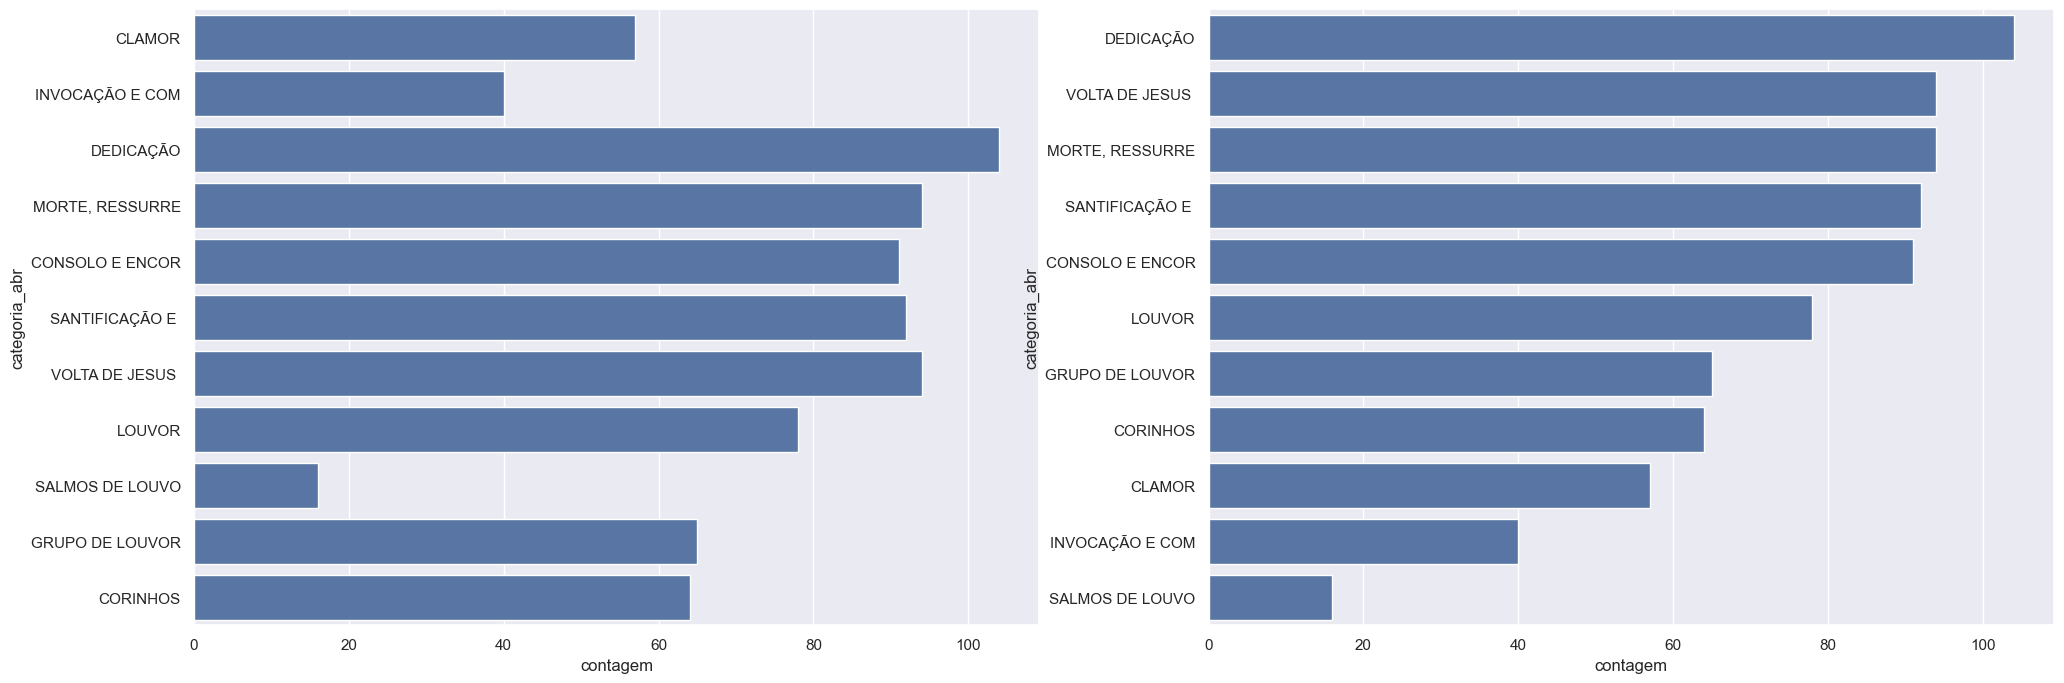

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")


f, axs = plt.subplots(1, 2, figsize=(24, 8))
sns.barplot(x="contagem", y="categoria_abr", data=categorias_count, ax=axs[0])
sns.barplot(
    x="contagem",
    y="categoria_abr",
    data=categorias_count.sort_values(by="contagem", ascending=False),
    ax=axs[1],
)

In [7]:
import string
import nltk
from tqdm import tqdm

nltk.download("stopwords")

stopwords = nltk.corpus.stopwords.words("portuguese")
texto_processado = []
titulo_processado = []
punctuations = string.punctuation.replace("-", "")

for hino in tqdm(hinos_analise.to_dict("records")):
    texto = hino["texto_limpo"].translate(str.maketrans("", "", punctuations))
    texto = " ".join([palavra.upper() for palavra in texto.split()])
    texto = " ".join(
        [palavra for palavra in texto.split() if palavra.lower() not in stopwords]
    )
    texto_processado.append(texto)

    titulo = hino["nome_limpo"].translate(str.maketrans("", "", punctuations))
    titulo = " ".join([palavra.upper() for palavra in titulo.split()])
    titulo = " ".join(
        [palavra for palavra in titulo.split() if palavra.lower() not in stopwords]
    )
    titulo_processado.append(titulo)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
  0%|          | 0/795 [00:00<?, ?it/s]

100%|██████████| 795/795 [00:00<00:00, 1924.27it/s]


In [10]:
hinos_analise["texto_processado"] = texto_processado
hinos_analise["titulo_processado"] = titulo_processado
hinos_analise

,texto,texto_limpo,categoria_id,categoria,numero_int,nome_limpo,texto_processado,titulo_processado
0,"O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...","O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR,1,O SANGUE DE JESUS TEM PODER,SANGUE JESUS PODER PODER MIM PODE VALER COMUNH...,SANGUE JESUS PODER
1,O SANGUE DE JESUS TEM PODER (2x) O SANGUE DE J...,O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS...,1,CLAMOR,2,O SANGUE DE JESUS TEM PODER PARA SALVAR,SANGUE JESUS PODER SANGUE JESUS SANGUE JESUS S...,SANGUE JESUS PODER SALVAR
2,"CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...","CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR,3,CLAMO A TI,CLAMO TI Ó SENHOR CLAMO TI SALVADOR SANGUE VID...,CLAMO TI
3,"QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...","QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR,4,QUANDO TE PROSTRARES,PROSTRARES DIANTE DEUS LEMBRA JESUS CONTIGO PE...,PROSTRARES
4,"CLAMANDO ESTOU, Ó MEU JESUS, POR TEU SANGUE RE...","CLAMANDO ESTOU, Ó MEU JESUS, POR TEU SANGUE RE...",1,CLAMOR,5,CLAMANDO ESTOU,CLAMANDO Ó JESUS SANGUE REMIDOR SOCORRO SEI MA...,CLAMANDO
...,...,...,...,...,...,...,...,...
790,EU QUERO MAIS E MAIS DE CRISTO. EU QUERO MAIS ...,EU QUERO MAIS E MAIS DE CRISTO. EU QUERO MAIS ...,11,CORINHOS,791,EU QUERO MAIS E MAIS DE CRISTO,QUERO CRISTO QUERO PODER QUERO PRESENÇA QUERO ...,QUERO CRISTO
791,LOUVANDO A DEUS E CAINDO NA GRAÇA DE TODO O PO...,LOUVANDO A DEUS E CAINDO NA GRAÇA DE TODO O PO...,11,CORINHOS,792,LOUVANDO A DEUS,LOUVANDO DEUS CAINDO GRAÇA TODO POVO TODOS DIA...,LOUVANDO DEUS
792,"MESA PREPARADA, CABEÇA UNGIDA, CÁLICE TRANSBOR...","MESA PREPARADA, CABEÇA UNGIDA, CÁLICE TRANSBOR...",11,CORINHOS,793,MESA PREPARADA,MESA PREPARADA CABEÇA UNGIDA CÁLICE TRANSBORDA...,MESA PREPARADA
793,JESUS LIBERTOU MINH’ALMA DO MEU VIL PECADO. EL...,JESUS LIBERTOU MINH’ALMA DO MEU VIL PECADO. EL...,11,CORINHOS,794,JESUS LIBERTOU,JESUS LIBERTOU MINH’ALMA VIL PECADO FALANDO TI...,JESUS LIBERTOU


In [15]:
hinos_analise["titulo_tam_char"] = hinos_analise["nome_limpo"].str.len()
hinos_analise["titulo_tam_palavras"] = hinos_analise["nome_limpo"].str.split().str.len()
hinos_analise["texto_processado_tam_palavras"] = hinos_analise["texto_processado"].str.split().str.len()

hinos_analise.sort_values("texto_processado_tam_palavras", ascending=False)

,texto,texto_limpo,categoria_id,categoria,numero_int,nome_limpo,texto_processado,titulo_processado,titulo_tam_char,titulo_tam_palavras,texto_processado_tam_palavras
465,"EIS O ESTANDARTE TREMULANDO À LUZ, EIS A SUA D...","EIS O ESTANDARTE TREMULANDO À LUZ, EIS A SUA D...",6,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,466,EIS O ESTANDARTE,EIS ESTANDARTE TREMULANDO LUZ EIS DIVISA C’ROA...,EIS ESTANDARTE,16,3,144
730,"A DESDE O DIA EM QUE ACEITEI JESUS, A MINHA VI...","A DESDE O DIA EM QUE ACEITEI JESUS, A MINHA VI...",11,CORINHOS,731,SEQUÊNCIA DE LOUVORES Nº 1,DESDE DIA ACEITEI JESUS VIDA TRANSFORMOU AGORA...,SEQUÊNCIA LOUVORES Nº 1,26,5,136
363,DÁ-ME MAIS FÉ PRA QUE O MEU CHORO SOMENTE ESTA...,DÁ-ME MAIS FÉ PRA QUE O MEU CHORO SOMENTE ESTA...,5,CONSOLO E ENCORAJAMENTO,364,DÁ-ME MAIS FÉ,DÁ-ME FÉ PRA CHORO SOMENTE NOITE POSSA DURAR A...,DÁ-ME FÉ,13,3,131
706,"EU CONFIO EM TI, SENHOR! MESMO QUANDO TUDO NÃO...","EU CONFIO EM TI, SENHOR! MESMO QUANDO TUDO NÃO...",10,GRUPO DE LOUVOR,707,"EU CONFIO EM TI, SENHOR",CONFIO TI SENHOR TUDO VAI BEM ESPERANÇA FUGIR ...,CONFIO TI SENHOR,23,5,122
476,"SEMPRE VOU LEMBRAR DA CORAGEM E DO AMOR, DA FI...","SEMPRE VOU LEMBRAR DA CORAGEM E DO AMOR, DA FI...",6,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,477,SEMPRE VOU LEMBRAR,SEMPRE VOU LEMBRAR CORAGEM AMOR FIRMEZA VONTAD...,SEMPRE VOU LEMBRAR,18,3,117
...,...,...,...,...,...,...,...,...,...,...,...
400,"COMO TU QUERES, SENHOR, SOU TEU TU ÉS OLEIRO, ...","COMO TU QUERES, SENHOR, SOU TEU TU ÉS OLEIRO, ...",6,SANTIFICAÇÃO E DERRAMAMENTO DO ESPÍRITO SANTO,401,COMO TU QUERES,QUERES SENHOR ÉS OLEIRO VASO QUEBRA TRANSFORMA...,QUERES,14,3,11
737,"GLÓRIA, GLÓRIA, GLÓRIA AO SENHOR JESUS. DELE É...","GLÓRIA, GLÓRIA, GLÓRIA AO SENHOR JESUS. DELE É...",11,CORINHOS,738,"GLÓRIA, GLÓRIA",GLÓRIA GLÓRIA GLÓRIA SENHOR JESUS GLÓRIA PODER...,GLÓRIA GLÓRIA,14,2,10
191,"JESUS, JESUS, EU TE AMO, Ó MEU SALVADOR; EU TE...","JESUS, JESUS, EU TE AMO, Ó MEU SALVADOR; EU TE...",3,DEDICAÇÃO,192,"JESUS, JESUS, EU TE AMO",JESUS JESUS AMO Ó SALVADOR QUERO ESPERO SENHOR...,JESUS JESUS AMO,23,5,10
742,"VENCEDOR SEREI, (BIS) NADA ME ESPANTA, A CAUSA...","VENCEDOR SEREI, NADA ME ESPANTA, A CAUSA É SA...",11,CORINHOS,743,VENCEDOR SEREI,VENCEDOR NADA ESPANTA CAUSA SANTA VENCEDOR VEN...,VENCEDOR,14,2,10
